In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import matplotlib.pyplot as pp

In [3]:
def plot(X):
    fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
    fig.add_subplot(111, projection='3d').scatter(-X[:,0],
                                              X[:,1],
                                              X[:,2]);
    plt.show()

In [4]:
class PCA():
    def __init__(self, method = 'Broken stick'):
        """
        method - number of embedding dimensionality (int) or 
        string 'Broken stick'. 
        The last option means algorithm chooses dimensionality
        utomatically with broken stick rule.
        """
        self.method = method
        if type(method) == int:
            self.rank = method
        self.is_fited = False
        
    def fit(self, X):
        if type(self.method) == int:
            print("WARN: Method fit is not available if number of main components has been olready choosen.\n",
                  "Please, choose another method to fit model.", sep="")
            return
        
        L = []
        n = X.shape[0]
        for i in range(1, n+1):
            L.append(np.sum([1/j for j in range(i, n+1)]))
        self.L = np.array(L)/n
        
        X_mean = X - X.mean(axis=0)
        U, S, V = np.linalg.svd(X_mean.T)
        
        if self.method == 'Broken stick':
            eig_vals_normed = S / np.sum(S) 
            rank = 0
            for eig_val, l in zip(eig_vals_normed, self.L):
                if eig_val < l:
                    self.rank = rank
                rank += 1
                
        else: print("Please, choose right option of parameter method.")
            
        self.is_fited = True
    
    def transform(self, X):
        """
        X - np.array, X.sahpe == (n_samles, n_features).
        return data reduced by PCA.
        """
        if type(self.method) != int and not self.is_fited:
            print("Fit the model before transform.")
            return
        
        X_mean = X - X.mean(axis=0)
        U, S, V = np.linalg.svd(X_mean.T)
        
        if type(self.method) == int:
            return np.diag(S[:self.rank]) @ V[:self.rank]
        
        elif self.method == 'Broken stick':
            eig_vals_normed = S / np.sum(S) 
            rank = 0
            for eig_val, l in zip(eig_vals_normed, self.L):
                if eig_val < l:
                    return np.diag(S[:rank]) @ V[:rank]
                rank += 1
        
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

Однометрный датасет, представляющий собой линию соединяющую точку (0, 0, 0) и (1, 1, 1):

In [5]:
X_line = []
n = 100
for t in range(n+1):
    X_line.append([t, t, t])
X_line = np.array(X_line) / n

Синусоида, вложенная в трехмерное пространсвто:

In [6]:
X_sin = []
n = 100
for t in range(n+1):
    X_sin.append([t / n, np.sin(np.pi * 4 * t / n), t / n])
X_sin = np.array(X_sin)

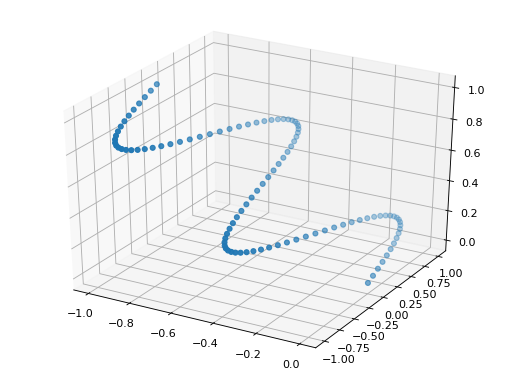

In [7]:
plot(X_sin)

Создадим, объект класса PCA, отбирающий значащие сингулярные значения по нравилу сломанной трости:

In [8]:
pca = PCA('Broken stick')

Применим алгоримт на X_line:

In [9]:
V_line = pca.fit_transform(X_line)

Как и ожидалось, алгоритм распознал одномерную структуру данных:

In [10]:
V_line.shape

(1, 101)

Попробуем также применить алгоритм к двумерным данным:

In [11]:
V_sin = pca.fit_transform(X_sin)

In [12]:
V_sin.shape

(2, 101)

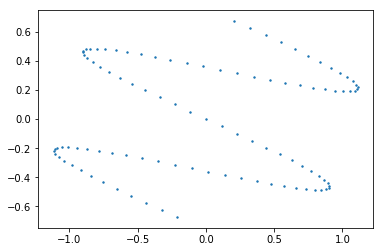

In [13]:
plt.scatter(V_sin[0], V_sin[1], s=2)

In [18]:
X_mean = X_sin - X_sin.mean(axis=0)
U, S, V = np.linalg.svd(X_mean.T)

In [19]:
U

array([[ 2.09090939e-01,  6.75485736e-01, -7.07106781e-01],
       [-9.55281089e-01,  2.95699242e-01, -2.77555756e-17],
       [ 2.09090939e-01,  6.75485736e-01,  7.07106781e-01]])